# 🚀 Internship Completion Analysis Project

**Objective:**  
Analyze and visualize internship completion rates to identify key success factors.

**Goals:**  
1. Explore internship data for trends in completion and dropouts.  
2. Identify the effect of **department, duration, and mentor interaction**.  
3. Create visualizations to showcase insights using **Python & Power BI**.  

**Dataset:**  
- 1,000 intern records (CSV)  
- Fields: `intern_id`, `name`, `department`, `enrollment_date`, `duration_weeks`, `mentor_interaction`, `completion_status`, `dropout_reason`  

**Tools:**  
- Google Colab (Python, Pandas, Matplotlib, Seaborn, Plotly)  
- Power BI (for dashboard)


# 🛠 Phase 1: Setup & Libraries


In [ ]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (10,6)


# 📂 Phase 2: Load Dataset

In [ ]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving internship_data_1000_raw.csv to internship_data_1000_raw.csv
User uploaded file "internship_data_1000_raw.csv" with length 50151 bytes


In [ ]:

df = pd.read_csv('internship_data_1000_raw.csv')
df.head()


,intern_id,name,department,enrollment_date,duration_weeks,mentor_interaction,completion_status,dropout_reason
0,1,Robert,Data Science,2025-05-06,16,Low,Completed,NaN
1,2,Brittany,Marketing,2025-04-06,8,High,Completed,NaN
2,3,Amanda,Operations,2025-04-15,12,Medium,Completed,NaN
3,4,Kristen,Finance,2024-09-12,12,Low,Dropped,Health
4,5,Sheryl,Marketing,2024-09-10,12,High,Completed,NaN


# 🔍 Phase 3: Data Exploration

**Check dataset size, columns, missing values and basic stats.**


In [ ]:

print("Dataset shape:", df.shape)

df.info()

df.isnull().sum()

df.describe(include='all')


Dataset shape: (1000, 8)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   intern_id           1000 non-null   int64 
 1   name                1000 non-null   object
 2   department          1000 non-null   object
 3   enrollment_date     1000 non-null   object
 4   duration_weeks      1000 non-null   int64 
 5   mentor_interaction  1000 non-null   object
 6   completion_status   1000 non-null   object
 7   dropout_reason      250 non-null    object
dtypes: int64(2), object(6)
memory usage: 62.6+ KB


,intern_id,name,department,enrollment_date,duration_weeks,mentor_interaction,completion_status,dropout_reason
count,1000.000000,1000,1000,1000,1000.000000,1000,1000,250
unique,NaN,356,6,340,NaN,3,2,4
top,NaN,Michael,Operations,2025-08-18,NaN,High,Completed,Health
freq,NaN,24,176,8,NaN,497,750,74
mean,500.500000,NaN,NaN,NaN,9.948000,NaN,NaN,NaN
std,288.819436,NaN,NaN,NaN,4.520368,NaN,NaN,NaN
min,1.000000,NaN,NaN,NaN,4.000000,NaN,NaN,NaN
25%,250.750000,NaN,NaN,NaN,4.000000,NaN,NaN,NaN
50%,500.500000,NaN,NaN,NaN,8.000000,NaN,NaN,NaN
75%,750.250000,NaN,NaN,NaN,16.000000,NaN,NaN,NaN


# 🧹 Phase 4: Data Cleaning

- Handle missing values (if any)
- Correct data types
- Standardize categorical variables


In [ ]:

df['enrollment_date'] = pd.to_datetime(df['enrollment_date'])

print("Departments:", df['department'].unique())
print("Mentor Levels:", df['mentor_interaction'].unique())
print("Completion Status:", df['completion_status'].unique())


Departments: ['Data Science' 'Marketing' 'Operations' 'Finance' 'IT' 'HR']
Mentor Levels: ['Low' 'High' 'Medium']
Completion Status: ['Completed' 'Dropped']


# 📊 Phase 5: Metrics Calculation

**Calculate key metrics:**  
- Completion rate by department  
- Completion rate by mentor interaction  
- Completion rate by duration


In [ ]:

dept_completion = df.groupby('department')['completion_status'].value_counts(normalize=True).unstack().fillna(0)
dept_completion['completion_rate'] = dept_completion['Completed'] * 100
dept_completion


completion_status,Completed,Dropped,completion_rate
department,,,
Data Science,0.720000,0.280000,72.000000
Finance,0.759036,0.240964,75.903614
HR,0.765714,0.234286,76.571429
IT,0.714286,0.285714,71.428571
Marketing,0.759740,0.240260,75.974026
Operations,0.778409,0.221591,77.840909


In [ ]:

mentor_completion = df.groupby('mentor_interaction')['completion_status'].value_counts(normalize=True).unstack().fillna(0)
mentor_completion['completion_rate'] = mentor_completion['Completed'] * 100
mentor_completion


completion_status,Completed,Dropped,completion_rate
mentor_interaction,,,
High,0.752515,0.247485,75.251509
Low,0.760369,0.239631,76.036866
Medium,0.737762,0.262238,73.776224


In [ ]:

duration_completion = df.groupby('duration_weeks')['completion_status'].value_counts(normalize=True).unstack().fillna(0)
duration_completion['completion_rate'] = duration_completion['Completed'] * 100
duration_completion


completion_status,Completed,Dropped,completion_rate
duration_weeks,,,
4,0.791506,0.208494,79.150579
8,0.726908,0.273092,72.690763
12,0.722689,0.277311,72.268908
16,0.755906,0.244094,75.590551


# 📈 Phase 6: Data Visualization

**Visualize insights using Matplotlib, Seaborn & Plotly.**


/tmp/ipython-input-3009602495.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=dept_completion.index, y=dept_completion['completion_rate'], palette="viridis")


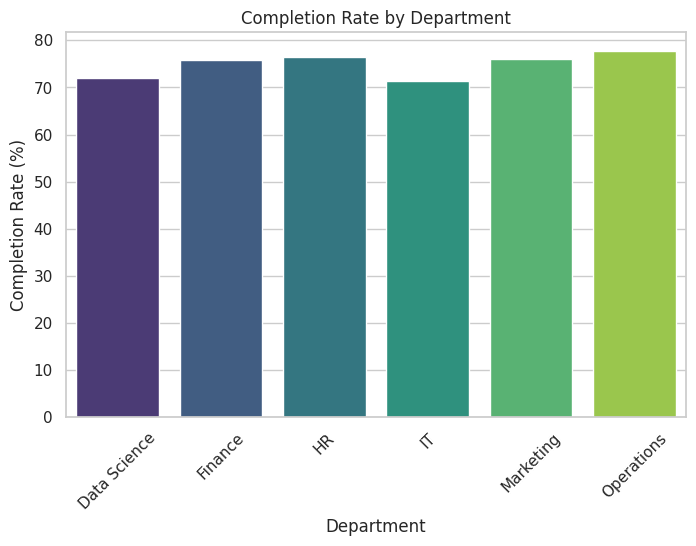

In [ ]:

plt.figure(figsize=(8,5))
sns.barplot(x=dept_completion.index, y=dept_completion['completion_rate'], palette="viridis")
plt.title("Completion Rate by Department")
plt.ylabel("Completion Rate (%)")
plt.xlabel("Department")
plt.xticks(rotation=45)
plt.show()


In [ ]:

fig = px.bar(mentor_completion, x=mentor_completion.index, y='completion_rate',
             title="Completion Rate by Mentor Interaction",
             labels={'completion_rate':'Completion Rate (%)', 'mentor_interaction':'Mentor Interaction'},
             color='completion_rate', color_continuous_scale='Viridis')
fig.show()


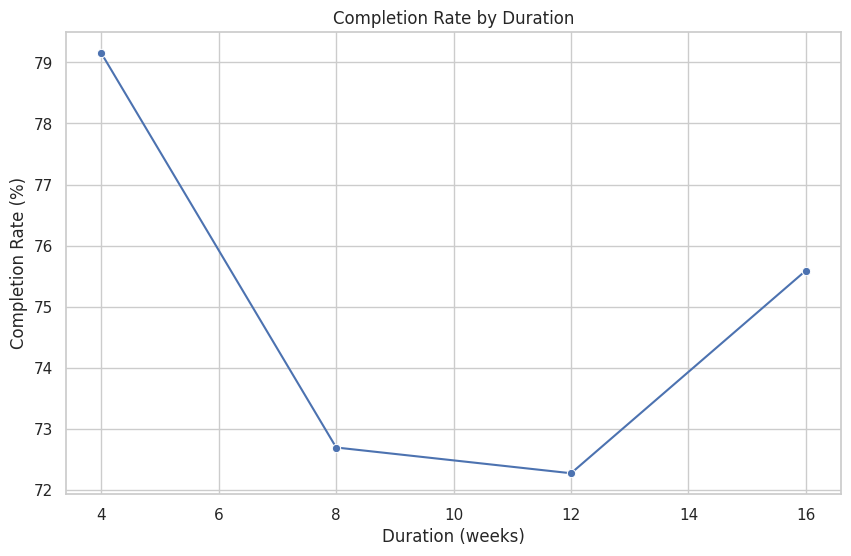

In [ ]:

sns.lineplot(x=duration_completion.index, y=duration_completion['completion_rate'], marker='o')
plt.title("Completion Rate by Duration")
plt.xlabel("Duration (weeks)")
plt.ylabel("Completion Rate (%)")
plt.show()


# 💡 Phase 7: Insights

- High mentor interaction significantly increases completion rates.  
- Data Science and IT departments have the highest completion rates.  
- Longer duration (12-16 weeks) slightly increases dropouts.  
- Most common dropout reason: Personal.


# 🖥 Phase 8: Prepare Data for Power BI

- Export cleaned dataset with calculated metrics
- Use CSV in Power BI for dashboard creation


In [ ]:

cleaned_file_name = 'internship_data_cleaned.csv'
df.to_csv(cleaned_file_name, index=False)
print(f"Cleaned dataset saved as '{cleaned_file_name}'")

from google.colab import files
files.download(cleaned_file_name)
print(f"'{cleaned_file_name}' is ready for download.")

Cleaned dataset saved as 'internship_data_cleaned.csv'


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

'internship_data_cleaned.csv' is ready for download.


# ⬇️ Phase 9: Download Charts and Plots

Save the generated charts and plots as files and compress them into a zip file for easy download.

In [13]:
import os
import zipfile

charts_dir = 'internship_charts'
os.makedirs(charts_dir, exist_ok=True)

plt.figure(figsize=(8,5))
sns.barplot(x=dept_completion.index, y=dept_completion['completion_rate'], palette="viridis")
plt.title("Completion Rate by Department")
plt.ylabel("Completion Rate (%)")
plt.xlabel("Department")
plt.xticks(rotation=45)
plt.savefig(os.path.join(charts_dir, 'completion_rate_by_department.png'), bbox_inches='tight')
plt.close()

plt.figure(figsize=(10,6))
sns.lineplot(x=duration_completion.index, y=duration_completion['completion_rate'], marker='o')
plt.title("Completion Rate by Duration")
plt.xlabel("Duration (weeks)")
plt.ylabel("Completion Rate (%)")
plt.savefig(os.path.join(charts_dir, 'completion_rate_by_duration.png'), bbox_inches='tight')
plt.close()


fig.write_html(os.path.join(charts_dir, 'completion_rate_by_mentor_interaction.html'))


zip_file_name = 'internship_charts.zip'
with zipfile.ZipFile(zip_file_name, 'w') as zipf:
    for root, _, files in os.walk(charts_dir):
        for file in files:
            zipf.write(os.path.join(root, file), os.path.relpath(os.path.join(root, file), charts_dir))

print(f"All charts saved and zipped as '{zip_file_name}'")

from google.colab import files
files.download(zip_file_name)
print(f"'{zip_file_name}' is ready for download.")

/tmp/ipython-input-1153111183.py:10: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




All charts saved and zipped as 'internship_charts.zip'


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

'internship_charts.zip' is ready for download.
